##### [< Forrige](7.2%20-%20SeaBorn.ipynb)     |     [Neste >](9%20-%20simulering.ipynb)

<span style="color:#9bb1d4;font-size:30px;font-weight:900"> 8 - SymPy </span>  

Sympy er en veldig nyttig pakke innenfor økonomi og samfunnsøkonomi. Med den kan vi regne analytisk, det vil si med symboler. I samfunnsøkonomi bruker vi mye matematikk som denne pakken kan hjelpe oss med. Vi starter med et eksempel på utregning av profittmaksimum:

# Eksempel med optimal mengde arbeidskraft

Anta at du er bedriftsleder, og lurer på hvor mange medarbeidere du skal ansette. For en gitt mengde arbeidskraft produseres

#### Eksempel 1:

In [2]:
# f returnerer hvor mye som produseres. 
# a er produktivitet til de ansatte
# L er antall ansatte

def f(L,a):
    return 60*L**a

`a` definerer produktiviteten til de ansatte. Desto høyere `a` er, desto mer produktive er de ansatte. 
`L` er antall ansatte.

Vi kan plotte denne funksjonen:

#### Eksempel 2:

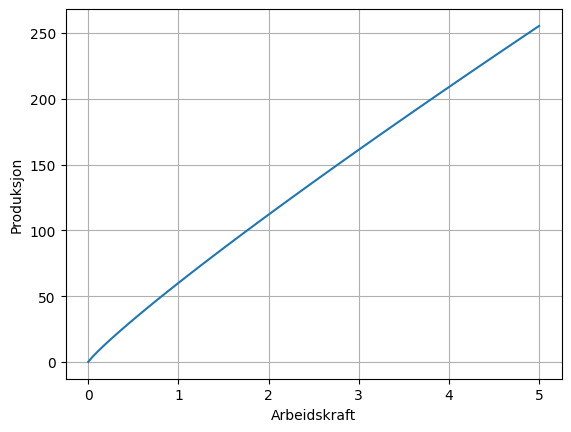

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,5,100)

plt.plot(x,f(x, 0.9))
plt.xlabel('Arbeidskraft')
plt.ylabel('Produksjon')
 
plt.grid(True)

plt.show()

Som vi ser er produktiviteten avtakende, kurven stiger mindre utover i diagrammet. Det er fordi `a` er mindre enn én. (Forsøk med andre tall for `a`!)

Når produktfunksjonen er definert, kan vi definere fortjenesten til bedriften, eller "profittfunksjonen" som vi gjerne kaller det i samfunnsøkonomi. La oss si at bedriften betaler hver arbeider `w` kroner, og kapital er `K`. 

Fortjenesten er pris ganger solgt mengde, `p*f(L,a)` og kostnadene er lønnskostnader `w*L` og kapital `K`. Profittfunksjonen blir da

#### Eksempel 3:

In [6]:
def profit(L,a,w,p,K):
    return p*f(L,a)-w*L-K

La oss se på den grafisk. Dersom prisen per enhet er hundre kroner, lønna er 2 500 per dag og bedriften trengte 300 000 i kapital, så ser profittfunksjonen slik ut:

#### Eksempel 4:

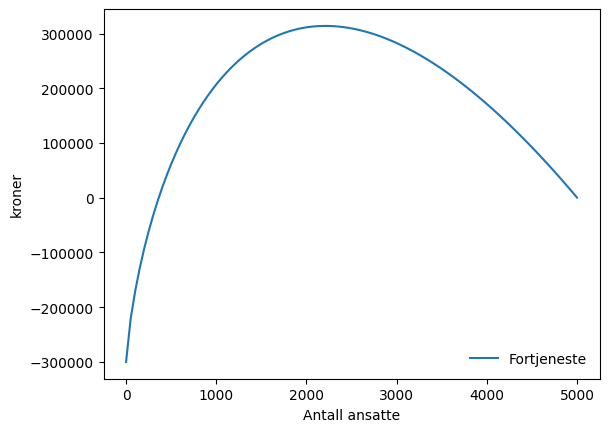

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Creating the plot
x = np.linspace(0,5000,100)
fig,ax=plt.subplots()
ax.set_ylabel('kroner')
ax.set_xlabel('Antall ansatte')


# Plotting the function
plt.plot(x,profit(x,0.9,2500,100,300000),label='Fortjeneste')
ax.legend(loc='lower right',frameon=False)

plt.show()


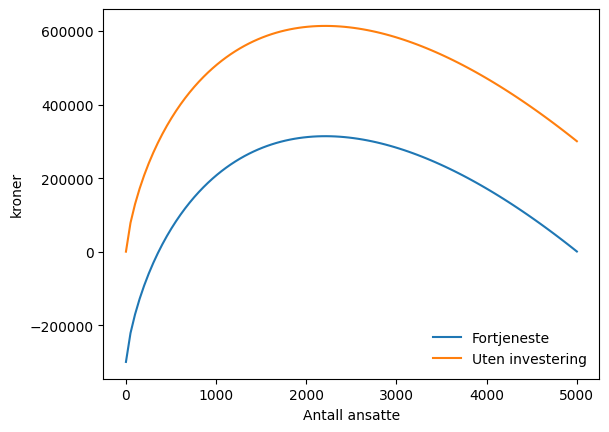

In [8]:
# Her plotter vi uten investering for oppstart
def profit2(L,a,w,p):
    return p*f(L,a)-w*L
ax.plot(x,profit2(x,0.9,2500,100), label='Uten investering')
ax.legend(loc='lower right',frameon=False)
fig

Vi bruker metoden med `fig,ax=plt.subplots()`, siden vi skal bygge på denne grafen. 

Vi skal nå begynne å bruke sympy. Det første vi må gjøre er å definere hvilke symboler som skal behandles analytisk (altså som symboler og ikke flyttall). Det gjør vi slik:

#### Eksempel 5:

In [9]:
import sympy as sp

L,a,w,p,K = sp.symbols("L a w p K")

Med symbolene definert, vil nå vår profittfunksjon vises analytisk når vi bruker de definere symbolene:


#### Eksempel 6:

In [10]:
profit(L,a,w,p,K)

-K - L*w + 60*L**a*p

Vi ønsker å finne ut for hvilken arbeidskraft fortjenesten er størst. Det er det høyeste punktet i figuren fra Eksempel 3. På dette punktet har profittfunksjonen ingen stigning, slik at den deriverte er null. For å finne dette punktet må vi først finne den *deriverte*. Det gjør vi i sympy med funksjonen `diff()`. Den tar to argumenter. Det første er funksjonen, det andre er den variabel vi ønsker å derivere med hensyn til. 

Som vi ser av figuren i Eksempel 3, så har vi arbeidskraft `L` langs x-aksen, så det er denne variabelen vi ønsker å derivere med hensyn til. Den deriverte av `profit()` med hensyn til `L` er dermed:

#### Eksempel 7:

In [11]:
d_profit = sp.diff(profit(L,a,w,p,K), L)
d_profit

-w + 60*L**a*a*p/L

For å finne punktet der denne deriverte er null, setter vi opp en ligning der den deriverte er null, og løser for den `L` som tilfredstiller ligningen. En slik ligning kalles "førsteordensbetingelse", eller "first order condition" på engelsk. Vi forkorter den derfor til "foc":

#### Eksempel 8:

In [12]:
foc = sp.Eq(d_profit, 0)
foc

Eq(-w + 60*L**a*a*p/L, 0)

Vi kan nå løse førsteordensbetingelsen med funksjonen `solve`, som ligger i modulen `solvers`i sympy:

#### Eksempel 9:

In [14]:
from sympy.solvers import solve

L_max = solve(foc,L)[0]
L_max

(60*a*p/w)**(-1/(a - 1))

Legg merke til at resultatet ligger i en liste med lengde 1, så vi må hente ut element 0 i listen for å vise resultatet. Vi kan finne hva den analytiske verdien er i maksimum ved å sette `L_max`inn i profittfunksjonen:

#### Eksempel 10:

In [15]:
profit_max = profit(L_max,a,w,p,K)
profit_max

-K + 60*p*((60*a*p/w)**(-1/(a - 1)))**a - w/(60*a*p/w)**(1/(a - 1))

Vi kan nå beregne de nummeriske verdiene ved å sette inn noen passende tall for de ukjente symbolene. Vi prøver med 0.9 for produktivitet `a`, 2500 for lønn `w`, 100 for pris `p` og 300000 for kapital `K`. Vi forteller sympy om at vi ønsker å bruke dise verdiene ved å lage et oppslag der hvert av symbolene er nøkkel til hver av de nummeriske verdiene:

#### Eksempel 11:

In [16]:
num_dict = {a:0.9, w:2500, p:100, K:300000}

Vi kan nå finne nummerisk hvor mye arbeidskraft som trengs for å oppnå maksimal fortjeneste:

#### Eksempel 12:

In [17]:
L_max.subs(num_dict)

2210.73919720734

Om vi nå legger dette tallet inn for symbol `L`, kan vi finne hvor stor fortjenesten er i dette punktet. Vi starter med å legge inn verdien for L som gir maksimal fortjeneste:

#### Eksempel 13:

In [18]:
num_dict[L] = L_max.subs(num_dict)
num_dict

{a: 0.9, w: 2500, p: 100, K: 300000, L: 2210.73919720734}

Med det oppdaterte oppslaget blir fortjenesten

#### Eksempel 14:

In [19]:
profit_max_num = float(profit(L,a,w,p,K).subs(num_dict))
profit_max_num

314094.22144648153

Med modulene `display`og `Markdown`fra `IPython` (pakken som driver Jupyter), kan vi sette dette in i en pen tabell:

#### Eksempel 15:

In [20]:
from IPython.display import Markdown

tbl=f"""
|                                 | Desimalverdi                             |  Analytisk verdi              | 
| :-------------------------------| :----------------------------------------| :-----------------------------| 
| Optimal mengde arbeidskraft:     | ${np.round(float(num_dict[L]),1)}$         |${sp.latex(L_max)}$            | 
| Maksimal profitt                | ${np.round(float(profit_max_num),1)}$    |${sp.latex(profit_max)}$       | 

"""
display(Markdown(tbl))


|                                 | Desimalverdi                             |  Analytisk verdi              | 
| :-------------------------------| :----------------------------------------| :-----------------------------| 
| Optimal mengde arbeidskraft:     | $2210.7$         |$\left(\frac{60 a p}{w}\right)^{- \frac{1}{a - 1}}$            | 
| Maksimal profitt                | $314094.2$    |$- K + 60 p \left(\left(\frac{60 a p}{w}\right)^{- \frac{1}{a - 1}}\right)^{a} - w \left(\frac{60 a p}{w}\right)^{- \frac{1}{a - 1}}$       | 



La oss nå plotte løsningen. Vi plotter her følgende, i rekkefølge:
1. Den opprinnelige profittfunksjonen
2. Den horisontale tangenten som tangerer i maksimumspunktet
3. En vertikal linje som viser mengden arbeidskraft i optimum. 

Legg merke til at vi legger inn verdiene vi har definert i `num_dict` inn i profittfunksjonen. Generelt er det en god idé i programmering å "hardkode" tall minst mulig. Definer det heller tallet som en variabel eller element i en `dict`og referer til det senere. 

#### Eksempel 16:

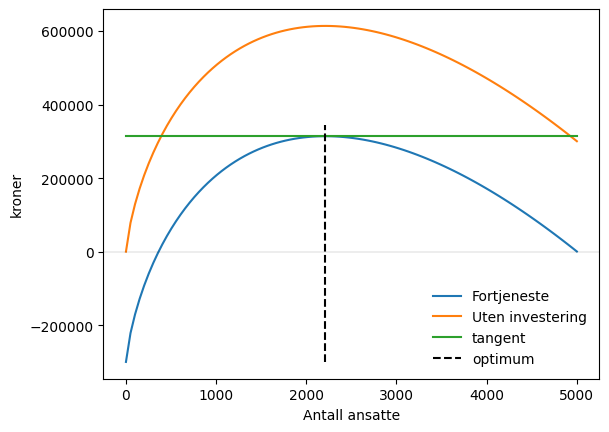

In [21]:

ax.plot(x,
        profit_max_num*np.ones(len(x)),
        label='tangent')
ax.vlines(float(L_max.subs(num_dict)), 
          -300000, 
          profit_max_num*1.1,
          colors=['black'],
          linestyles='dashed',
          label='optimum')

ax.legend(loc='lower right',frameon=False)
ax.axhline(0, color='black',lw=0.1)
fig

# Eksempel med tilbud og etterspørsel

I forelesning 3 definerte vi disse tilbuds og etterspørselsfunksjonene:

#### Eksempel 17:

In [22]:
def supply(x):
    return (x**2)*(1/250)
    
def demand(x):
    return 3000/(100+x)

Og vi tegnet dem slik:

#### Eksempel 18:

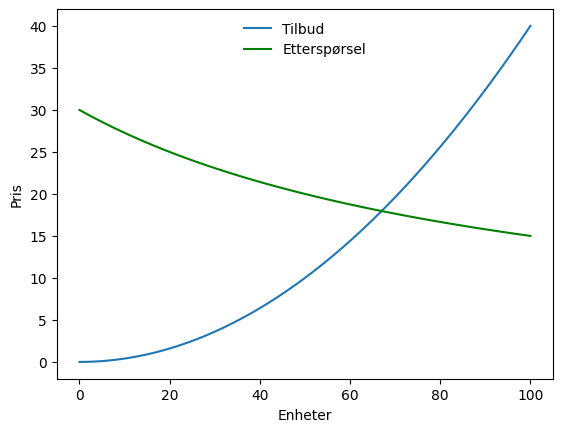

In [23]:
# Drawing 100 points in the interval 0.0 to 100
q = np.linspace(1,100,100)

# Creating the plot
q = np.linspace(0,100,100)
fig,ax=plt.subplots()
ax.set_ylabel('Pris')
ax.set_xlabel('Enheter')


# Drawing supply
ax.plot(q,supply(q),label='Tilbud')

# Drawing demand
ax.plot(q,demand(q),color='green',label='Etterspørsel')

# Adding legend:
ax.legend(loc='upper center',frameon=False)

plt.show()

Vi løste da likevekten grafisk, ved å se sånn cirka hvor tilbud er lik etterspørsel. Med sympy kan vi la python regne ut dette, og konsument og produsentoverskudd. Vi gjør dette ved å definere mengde `x` som en eksogen variabel, og sette opp ligningen vi trenger, altså at tilbud skal være lik etterspørsel:

#### Eksempel 19:

In [24]:
x = sp.symbols('x')

eq_cond = sp.Eq(demand(x),supply(x))
eq_cond

Eq(3000/(x + 100), 0.004*x**2)

Vi kan nå løse dette med solve fra sympy, som i forrige eksempel:

#### Eksempel 20:

In [25]:
x_eq = solve(eq_cond,x)
x_eq[0]

67.0125415064549

In [26]:
x_eq

[67.0125415064549,
 -83.5062707532274 - 64.9510401355397*I,
 -83.5062707532274 + 64.9510401355397*I]

Bare én av disse løsningene er gyldige. De to siste i listen `x_eq`er såkalte "imaginære tall", det ser vi av `I`'en. Vi går ikke lenger inn på hva dette er her, men nøyer oss med å si at en likevekt ikke kan være et imaginært tall. Løsningen er altså `x_eq[0]`. Vi kan sette denne inn i enten tilbuds eller etterspørselfunksjonen for å få likevektsprisen 

#### Eksempel 21:

In [27]:
p_eq = demand(x_eq[0])
print(f"""
Likevektspris er {p_eq}
Likevektskvantum er {x_eq[0]}
""")


Likevektspris er 17.9627228766173
Likevektskvantum er 67.0125415064549



Etterspørselskurven kan ses på som en rekke med konsumenter med ulik betalingsvilje i fallende rekkefølge. Alle konsumentene som betaler `p_eq` har dermed et overskudd som er lik differansen mellom `p_eq` og konsumentens punkt på etterspørselskurven. Summen av alle konsumentenes overskudd kalles konsumentoverskuddet. Dette kan illustreres ved å legge  et skravert område til figuren over

#### Eksempel 22:

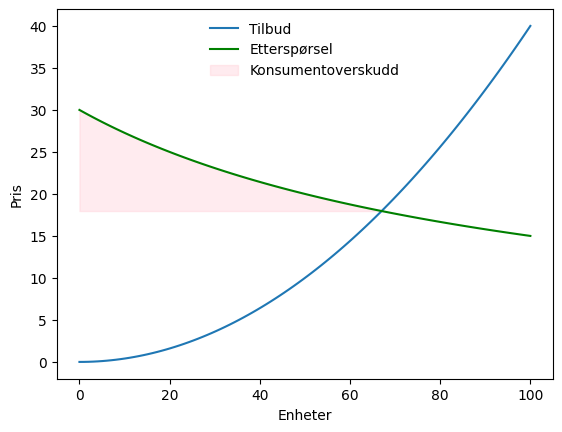

In [28]:
q = np.linspace(0,float(x_eq[0]),100)
ax.fill_between(q,float(p_eq),demand(q), color = "pink",alpha = 0.3,label='Konsumentoverskudd')
ax.legend(loc='upper center',frameon=False)
fig

Akkrat som at vi kan regnet ut skjæringspunktet med sympy, så kan vi regne ut det skraverte konsumentoverskuddet. Vi bruker da det vi har lært i matematikkurset; arealet under en funksjon er integralet til funksjonen. Vi skal finne arealet under etterspørselsfunksjonen `demand(x)`, men kun ned til prisen `p_eq`, så vi integrer differansen `demand(x)-p_eq`. Dette gjør vi for alle omsatte enheter, altså frem til omsatt kvantum `x_eq[0]`. 

Vi skal altså integrere  `demand(x)-p_eq` i intervalet 0 til `x_eq[0]`. Det kan vi gjøre i sympy slik:

#### Eksempel 23:

In [29]:
consumer_surplus = sp.integrate(demand(x)-float(p_eq),(x,0,x_eq[0]))
consumer_surplus

334.968455011534

På samme måte er *produsentoverskuddet* arealet over tilbuskurven, opp til prisen, altså det gule området i figuren under

#### Eksempel 24:

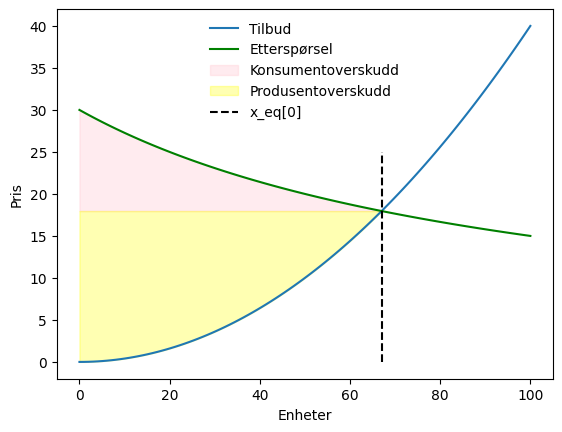

In [30]:
ax.fill_between(q,supply(q),float(p_eq), color = "yellow",alpha = 0.3,label='Produsentoverskudd')
ax.vlines(float(x_eq[0]), 0, 25,colors=['black'],linestyles='dashed', label='x_eq[0]')
ax.legend(loc='upper center',frameon=False)
fig

Vi kan regne ut dette område også, som altså er integralet av differansen mellom prisen og tilbudskruven, frem til  `x_eq[0]`.

#### Eksempel 25:

In [31]:
producer_surplus = sp.integrate(p_eq-supply(x),(x,0,x_eq[0]))
producer_surplus

802.485141558844

Summen av produsentoverskuddet og konsumentoversdkuddet kalles "velferdsgevinsten". Vi kan finne den ved å legge sammen konsument- og produsentoverskudd:

#### Eksempel 26:

In [32]:
producer_surplus + consumer_surplus

1137.45359657038

Eller ved å ta integralet av differansen mellom etterspørsel og tilbud:

#### Eksempel 27:

In [33]:
welfare_surplus = sp.integrate(demand(x)-supply(x),(x,0,x_eq[0]))
welfare_surplus

1137.45359657038

Vi kan nå lage en tabell som oppsumerer resultatene:

#### Eksempel 28:

In [34]:
tbl=f"""
|                     | Verdi                                    |
| :-------------------| :----------------------------------------|
| Solgt mengde:       | ${np.round(float(x_eq[0]),1)}$           |
| Pris:               | ${np.round(float(p_eq),1)}$              |
| Verdiskapning:      | ${np.round(float(welfare_surplus),1)}$  |
| Konsumentoverskudd: | ${np.round(float(consumer_surplus),1)}$ | 
| Produsentoverskudd: | ${np.round(float(producer_surplus),1)}$ | 
| Velferdsgevinst:    | ${np.round(float(welfare_surplus),1)}$   | 
"""
display(Markdown(tbl))


|                     | Verdi                                    |
| :-------------------| :----------------------------------------|
| Solgt mengde:       | $67.0$           |
| Pris:               | $18.0$              |
| Verdiskapning:      | $1137.5$  |
| Konsumentoverskudd: | $335.0$ | 
| Produsentoverskudd: | $802.5$ | 
| Velferdsgevinst:    | $1137.5$   | 


# Løse flere ligninger med flere ukjente

I eksempel 20 hadde vi én ligning med én ukjent. Det er imidlertid enkelt å løse flere ligninger med flere ukjente. Forskjellen er bare at når det er flere ligninger, så setter vi hver av disse inn i en liste. Som dere vet må det være akkurat like mange ukjente som ligninger, så vi må også sette akkurat like mange variabler inn i en annen liste. Disse to listene utgjør så argumentene i `solve()` funksjonen. La oss ta et eksempel. Vi begynner med å definere to lister med henholdsvis tre variabler og tre ligninger:

#### Eksempel 29:

In [35]:
x,y,z=sp.symbols("x y z")
symbols=[x,y,z]
equations=[
    sp.Eq(2*x+8*y+3*z,7),
    sp.Eq(-3*x+15*y-14*z,-20),
    sp.Eq(11*x-6*y+7*z,35)
]

Vi setter så disse to listene inn i `solve()` akkurat som om det var én ligning og én ukjent, og finner svaret:

#### Eksempel 30

In [36]:
solve(equations,symbols)

{x: 3868/1463, y: -6/77, z: 1139/1463}

# **Oppgaver**

# Oppgave 1 - SymPy
Her skal dere løse matematikkoppgaver med Sympy, og bruke fordelene som programmering gir til å løse oppgavene så effektivt som mulig. I stedet for å løse hver oppgave individuelt, skal dere derfor lage funksjoner som tar uttrykkene som argumenter, og så løse hver oppgave.

## [Likningssett - faktoriseringsmetoden (klikk her for å laste ned oppgavene)](https://github.com/uit-bed-1504-h25/uit-bed-1504-h25.github.io/blob/main/docs/17_Likningssett_faktoriseringsmetoden_oppgaver.pdf)

Lag en funksjon `test_solve(eqs)` der `eqs` er et Sympy ligningssett, og der du bruker `solve(f)` til å finne løsning på likhetene. Lag en test i funksjonen, ved å sette løsningen inn i likheten. 

Funksjonen skal returnere både svaret og resultatet av løsningen.

## [Grunnleggende derivasjonsregler (klikk her for å laste ned oppgavene)](https://github.com/uit-bed-1504-h25/uit-bed-1504-h25.github.io/blob/main/docs/19_Grunnleggende_derivasjonsregler_oppgaver.pdf)

Løs alle oppgavene med Sympy i én celle. Bruk diff()-funksjonen for å derivere, og gjør koden så kort som mulig (i antall tegn, ikke antall linjer).

## [Produkt- og brøkregelen (klikk her for å laste ned oppgavene)](https://github.com/uit-bed-1504-h25/uit-bed-1504-h25.github.io/blob/main/docs/20_Produkt_og_brokregelen_oppgaver.pdf)

1. Forenkle uttrykkene i Oppgavene 1 a)-d) med færrest mulig tegn. Kommenter hvilke av oppgavene som lar seg forenkle.

2. Lag to funksjoner `f_deriv_prod(f, g)` og `f_deriv_frac(f, g)` som bruker henholdsvis produktregelen og brøkregelen til å derivere et uttrykk. Argumenter skal være de to delene i produktet. Om produktet for eksempel er $\sqrt{(3x-1)} * (1+x)$ skal argumentene være $\sqrt{(3x-1)}$ og $(1+x)$. Funksjonen skal returnere den deriverte av produktet.

Deriver alle utrykene i Oppgave 1e, 1f, ..., 1m med disse funksjonene, men velg først ut alle produktene og deriver de, før du i neste omgang deriverer brøkene.

3. Test at produktregelen fungerer ved å printe differansen mellom funksjonene over og derivering av hele uttrykket med sp.diff(). Du kan sette dette inn i koden over om du vil.

## [Kjerneregelen (klikk her for å laste ned oppgavene)](https://github.com/uit-bed-1504-h25/uit-bed-1504-h25.github.io/blob/main/docs/21_Kjerneregelen_oppgaver.pdf)

1.

Lag en funksjon `f_deriv_chain(f, g)` som bruker kjerneregelen til å derivere et uttrykk av typen $f\left(g(x)\right)$.

Har du for eksempel et uttrykk $\sqrt{(3x-1)}$, så er $f(y) = \sqrt{y}$ og $g(x) = 3x-1$. Funksjonen skal da returnere $f'\left(g(x)\right) \cdot g'(x)= \frac{1}{2}\frac{1}{\sqrt{(3x-1)}} \cdot 3$
 
 

Husk å bytt ut $y$ med $g(x)$ (i dette tilfelle ) før svaret returneres.

2.
a) Bruk `f_deriv_chain(f, g)` på uttrykkene i Oppgave 1 a), b), d), e) og Oppgave 2 a) og e).

b) Bruk `f_deriv_prod(f, g)` i kombinasjon med `f_deriv_chain(f(y), g(x))` og løs Oppgave 1 h) og Oppgave 2 b)

Test samtidig resultatene med `sp.diff()`, der du stter inn kjernen i funksjonen før du deriverer.

## [Derivasjon av logaritme og eksponentialfunksjoner (klikk her for å laste ned oppgavene)](https://github.com/uit-bed-1504-h25/uit-bed-1504-h25.github.io/blob/main/docs/22_Derivasjon_av_logaritme_og_eksponentialfunksjoner_oppgaver.pdf)

Løs følgende oppgaver: Oppgave 1 a), b), f) og Oppgave 2 a) og b). Lag koden med så få tegn som mulig.

# Ekstraoppgaver
Det vil være god trening, mot eksamen, å gå igjennom **alle** oppgavene fra SymPy-arkene over :-)

##### [< Forrige](7.2%20-%20SeaBorn.ipynb)     |     [Neste >](9%20-%20simulering.ipynb)